In [29]:
import pandas as pd
import numpy as np
from sklearn.cluster import KMeans
from sklearn.metrics import pairwise_distances
from scipy.cluster.hierarchy import linkage, dendrogram, cut_tree
from scipy.spatial.distance import pdist 
import matplotlib.pyplot as plt
%matplotlib inline


# Clustering

The workshop task this week involves unsupervised learning - an exercise in clustering. We'll use a Pokemon dataset to walk through the process of KMeans and Hierarchical Clustering.

## Pokemon Clustering

The Pokemon dataset that we used in Week 4 is a good example to use for clustering as it has a number of numerical fields giving the properties of each Pokemon. We can also imagine that there might be different types of Pokemon within the data, so using clustering methods to find the different types is a reasonable approach.  

First we read the data from the CSV file, we'll use the Pokemon name as the data frame index and drop the first column which is a useless index number. 

In [30]:
df = pd.read_csv('files/Pokemon.csv', index_col=1)
df.drop('Unnamed: 0', axis=1, inplace=True)
df.head()

,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Stage,Legendary
Name,,,,,,,,,,,
Bulbasaur,Grass,Poison,318,45,49,49,65,65,45,1,False
Ivysaur,Grass,Poison,405,60,62,63,80,80,60,2,False
Venusaur,Grass,Poison,525,80,82,83,100,100,80,3,False
Charmander,Fire,NaN,309,39,52,43,60,50,65,1,False
Charmeleon,Fire,NaN,405,58,64,58,80,65,80,2,False


Now you should apply the KMeans clustering method to this data. The first step is to select just the numerical fields in the data.  You can either drop the non-numerical fields or make a new data frame containing just the numerical ones (I suggest making a new data frame).

Then apply the KMeans clustering function to the data, following the steps in the lecture notes and text book.  Since we don't have any real idea how many clusters there could be in the data, start with a small number of clusters (eg. 4) just to make it easier to understand the clusters.

In [31]:
pokemon =df.drop(["Type 1","Type 2","Legendary" ] , axis=1 )
pokemon.head()



,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Stage
Name,,,,,,,,
Bulbasaur,318,45,49,49,65,65,45,1
Ivysaur,405,60,62,63,80,80,60,2
Venusaur,525,80,82,83,100,100,80,3
Charmander,309,39,52,43,60,50,65,1
Charmeleon,405,58,64,58,80,65,80,2


Once you have applied KMeans you will have some results to explore.  Your goal is to understand the clusters that have been produced. If you know something about Pokemon you might be able to recognise similarities between members of each cluster, if not (and even if you do) you need to understand what the members of each cluster have in common. 

The first task is to find out what the members of each cluster are.  To do this, generate a set of cluster labels using `km.predict()` on your original data and add this to the data frame (see [sklearn.cluster.KMeans](https://scikit-learn.org/stable/modules/generated/sklearn.cluster.KMeans.html)). Now, explore the difference between each cluster:
 
 * find the mean value for each column by cluster, you can do this by selecting the rows for each cluster and then taking the mean or by using the `groupby` method;
 * from these means, can you characterise the four clusters that were found, eg. "Cluster 0 are early stage Pokemon with relatively low HP, Attack and Defence ratings".  Provide descriptions like this of each cluster;
 * Identify two columns that seem to be more distinct between clusters, use these to plot the data with different colours for each cluster to visualise the result of clustering.  Comment on the separation of clusters in your plot;
 * Repeat the experiment with a larger number of clusters. Do more clusters make it easier to distinguish the clusters? 

In [42]:
km = KMeans(n_clusters=4) #we need 2 number of the cluster
km.fit (pokemon) #to train the function

KMeans(n_clusters=4)

In [43]:
pokemon["label"]=km.predict(pokemon) ## created a new column lable
print(pokemon.head(10))
#0 means they are in same cluster

            Total  HP  Attack  Defense  Sp. Atk  Sp. Def  Speed  Stage  label
Name                                                                         
Bulbasaur     318  45      49       49       65       65     45      1      1
Ivysaur       405  60      62       63       80       80     60      2      2
Venusaur      525  80      82       83      100      100     80      3      0
Charmander    309  39      52       43       60       50     65      1      1
Charmeleon    405  58      64       58       80       65     80      2      2
Charizard     534  78      84       78      109       85    100      3      0
Squirtle      314  44      48       65       50       64     43      1      1
Wartortle     405  59      63       80       65       80     58      2      2
Blastoise     530  79      83      100       85      105     78      3      0
Caterpie      195  45      30       35       20       20     45      1      3


In [44]:
pok=pokemon.groupby(["label"]).mean()
pok #Its better way to judge lable values as now we can explain or interpret.

,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Stage
label,,,,,,,,
0,516.038462,82.615385,93.096154,84.500000,87.250000,85.192308,83.384615,2.000000
1,319.851064,47.255319,57.936170,58.063830,52.957447,50.170213,53.468085,1.063830
2,423.282051,66.743590,73.358974,68.641026,69.897436,71.282051,73.358974,1.794872
3,238.000000,44.307692,40.769231,38.615385,29.692308,30.846154,53.769231,1.153846


Text(0, 0.5, 'Defense')

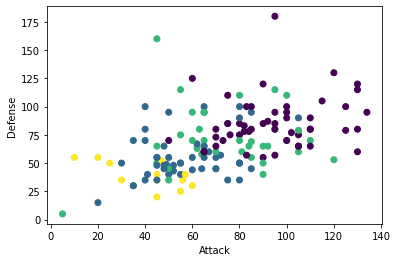

In [46]:
plt.scatter(pokemon["Attack"], pokemon["Defense"], c=pokemon["label"])
plt.xlabel("Attack")
plt.ylabel("Defense")

## conclusion
The more the number of cluster the harder to distinguish between them.

### Hierarchical Clustering

Since we don't know how many clusters there should be in the data, a better approach is to use Hierarchical clustering and examine the dendograph to understand what natural clusters are present in the data.  

Apply Hiearchical clustering to the data and plot the dendogram.  From this diagram, how many clusters should the data be separated into?   Can you characterise these clusters? 

In [47]:
dist =pdist(pokemon, "euclidean")
linkage_matrix =linkage(dist, method="complete")

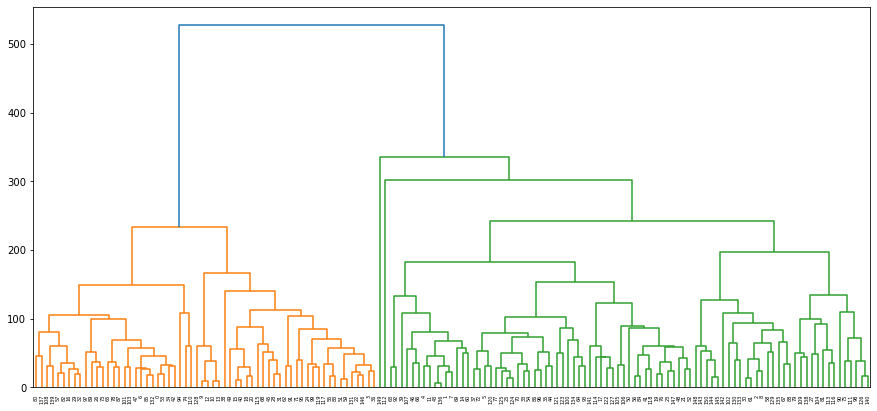

In [49]:
plt.figure(figsize=(15,7))
dendrogram(linkage_matrix)
plt.show()

In [51]:
###pokemon["label"]=cut_tree(linkage_matrix ,n_clusters=2)
##pokemon.head()